In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dataclasses import dataclass
from dataclasses_json import dataclass_json
from networkx.readwrite import json_graph
import json
import pprint

import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np

import IPython.display as ipy_display
from IPython.display import display, HTML, SVG
from pathlib import Path

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import rdkit.Chem.Descriptors
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import Draw


In [6]:
import sys
from pathlib import Path
project_dir = str(Path.cwd().parent)
if project_dir not in sys.path:
    sys.path.append(project_dir)
import src
from src import graphs, figures, vis, paths_and_constants

COLORS = src.paths_and_constants.COLORS

'/home/beangoben/.fonts/FiraCodeNerdFont-Regular.ttf'

In [14]:
vis.set_visualization_style()

## Font biz

## Drawing utils

In [51]:
COLS = {"node": [0.9924814063556459, 0.7706828938471941, 0.13536173089925596], "edge": [0.29980485085029285, 0.6460124523743146, 0.8794108354242172], "global": [0.9882352941176471, 0.5529411764705883, 0.3843137254901961], "adj": [0.6509803921568628, 0.8470588235294118, 0.32941176470588235], "node-swatches": [[0.9924814063556457, 0.8199527509810332, 0.13536173089925607], [0.8734523326572009, 0.6881261150847054, 0.05439080459770096], [1.0, 0.8649716891002563, 0.3278431372549018], [0.6487843137254902, 0.5344925526608907, 0.07905882352941163], [1.0, 0.8680118244380879, 0.527843137254902], [0.44411629479377945, 0.38078912302353574, 0.08372684246112228], [0.9999999999999999, 0.941544746203253, 0.727843137254902], [0.25944827586206887, 0.18886908222305776, 0.0683948613928329], [1.0, 0.9854492317374898, 0.9278431372549019]], "edge-swatches": [[0.29980485085029296, 0.6198860301949669, 0.879410835424217], [0.19282659604126007, 0.5686906640831233, 0.78638909023325], [0.4393817489080941, 0.7300312172571489, 0.9398339373664159], [0.19240349409906143, 0.39949472982800394, 0.5868121921754486], [0.5989586469658955, 0.7830998858687428, 0.9802570393086146], [0.17198039215686278, 0.3314409960146927, 0.40723529411764714], [0.7792156862745102, 0.9278005924207813, 0.9999999999999999], [0.13155729021466414, 0.19256663694469078, 0.24765839605984583], [0.97921568627451, 0.9899189954186047, 1.0]], "global-swatches": [[0.9882352941176471, 0.5807242903174685, 0.38431372549019605], [0.9431127450980393, 0.501711391346249, 0.22943627450980386], [0.9999999999999999, 0.7378560510911416, 0.5725490196078432], [0.8570588235294119, 0.2898052461009251, 0.11549019607843125], [0.9999999999999999, 0.8510427150963003, 0.7725490196078434], [0.6421813725490195, 0.3313420675459361, 0.13036764705882353], [1.0, 0.9777528957450206, 0.9725490196078432], [0.4473039215686274, 0.23638083876229615, 0.12524509803921569], [1.0, 1.0, 1.0]], "adj-swatches": [[0.7095309631894509, 0.8470588235294119, 0.3294117647058823], [0.5388328831623432, 0.7463025210084033, 0.23016806722689087], [0.7846005866262733, 0.915378151260504, 0.4610924369747901], [0.404954955008016, 0.5546218487394958, 0.2218487394957983], [0.8150637408089185, 0.9636974789915965, 0.6127731092436978], [0.3162871773972231, 0.3829411764705882, 0.1935294117647059], [0.912808207540323, 0.9920168067226892, 0.784453781512605], [0.19848715911984285, 0.23126050420168068, 0.14521008403361343], [0.9938807059543996, 1.0, 0.9764705882352942]], "background": [0.93, 0.93, 0.93]}

def light_color_cmap(color, name='test'):
    start_color = (1,1,1)
    end_color = color
    colors = [start_color, end_color]
    cmap = mpl.colors.LinearSegmentedColormap.from_list(name, colors,
                                                        N=256)
    return cmap

def draw_tensor(values, col, labels=None, cmaps=None, rsize=0.5,
                rotate_text=True, draw_text=True):
    assert values.ndim ==2 , 'Olny 2D tensors!'
    n,k = values.shape
    if labels is None:
        labels = [str(i) for i in range(k)]
    if cmaps is None:
        cmaps = [light_color_cmap(col)]*k

    width, height = n*rsize, k*rsize
    fig, ax = plt.subplots(figsize=(width, height))
    for i in range(n):
        for j in range(k):
            pos = i*rsize, height-(j+1)*rsize
            color = cmaps[j](values[i, j])
            rect = plt.Rectangle(pos, rsize, rsize, facecolor=color)
            ax.add_patch(rect)

    # Set axis limits and labels
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.yaxis.tick_left()  # Move x-ticks to the top
    ax.set_xticks([])
    ax.set_xticklabels([])
    if draw_text:
        ax.set_yticks(np.arange(rsize/2, height, rsize))
        ax.set_yticklabels(labels[::-1])
    else:
        ax.set_yticks([])
        ax.set_yticklabels([])

    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(2)
        spine.set_edgecolor(col)  # Or any color you prefer
    return

def one_hot_encode(values, n_classes):
    n = len(values)
    k = n_classes
    m = np.zeros((n,k))
    row_indices = np.arange(n)
    m[row_indices, values] = 1.0
    return m

def normalize_values(x, vmin, vmax):
    return np.clip((x - vmin) / (vmax - vmin), 0, 1.0)

def cast_as_2d(x):
    x = np.array(x)
    if x.ndim == 0:
        return np.array([[x]])
    elif x.ndim == 1:
        return x.reshape(-1, 1)
    return x

def build_drawing_parts(g, spec_list, main_color, extra_colors, extract_fn):
    tensors = {}
    names = []
    cmaps = []
    n_colors = sum(feat.dim if feat.is_discrete() else 1 for feat in spec_list)
    pal = extra_colors[:n_colors]
    cmaps = [light_color_cmap(c) for c in pal]
    for i, feat in enumerate(spec_list):
        name = feat.name
        value_dict = extract_fn(g, name)
        first = i ==0
        if not value_dict:
            raise ValueError(f'No attribute {name} in graph')
        if feat.data_type == 'categorical':
            id_map = {v:i for i,v in enumerate(feat.values)}
            ids = [id_map[v] for v in value_dict.values()]
            tensor = one_hot_encode(ids, len(feat.values))
            tensors[name] = tensor
            names.extend(feat.values)
            if first:
                colors = [cmaps[i](1.0) for i in np.argmax(tensor, axis=1)]
        elif feat.data_type == 'continuous':
            if feat.dim == 1:
                tensor = cast_as_2d(list(value_dict.values()))
            else:
                tensor = np.hstack(list(value_dict.values()))
            tensors[name] = normalize_values(tensor, feat.values[0], feat.values[1])
            names.append(name)
            if first:
                colors = [cmaps[0](vi) for vi in tensor[:, 0]]
        else:
            raise ValueError(f'Unknown data type {feat.data_type}')

    full_tensor = np.hstack(list(tensors.values()))
    return full_tensor, names, colors, cmaps


def draw_graph_legend(G, name, node_name, edge_name, fontsize=22, linespacing=1.2):
    fig = plt.gcf()
    ax = plt.gca()
    bbox = ax.get_position()
    upper_left_x = bbox.x1
    upper_left_y = bbox.y1

    fig.text(bbox.x0, bbox.y1, name,
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=fontsize,
            transform=fig.transFigure)

    text1 = plt.text(upper_left_x, upper_left_y, f'{len(G.nodes):3d} nodes ({node_name})', fontsize = fontsize,
            horizontalalignment='right',
            verticalalignment='top',
            transform=fig.transFigure)

    # Get the height of a single line of text in figure coordinates
    fig.canvas.draw()
    renderer = fig.canvas.get_renderer()
    bbox_text = text1.get_window_extent(renderer=renderer) #use text1 instead of creating a new one
    text_height_pixels = bbox_text.height
    text_height_figure = text_height_pixels / fig.dpi / fig.get_size_inches()[1]
    second_line_y = upper_left_y - text_height_figure * linespacing

    # Second text
    ax.text(upper_left_x, second_line_y, f'{len(G.edges):3d} edges ({edge_name})',
            horizontalalignment='right',
            verticalalignment='top',
            transform=fig.transFigure,
            fontsize=fontsize)

sns.set_style("whitegrid", {'axes.grid' : False})
np.set_printoptions(precision=3)


def display_svg(svg_text):
    ipy_display.display(SVG(svg_text))

def set_visualization_style():
    mpl.rcParams["font.sans-serif"] = ['Fira Code']
    mpl.rcParams["savefig.dpi"] = 300
    mpl.rcParams["savefig.pad_inches"] = 0.1
    mpl.rcParams["savefig.transparent"] = True
    # mpl.rcParams['axes.linewidth'] = 2.5
    mpl.rcParams["legend.markerscale"] = 1.0
    mpl.rcParams["legend.fontsize"] = "small"
    # seaborn color palette
    sns.set_palette("colorblind")



def save_figure(name, adir='.'):
    fig = plt.gcf()
    for ext in ['svg', 'png']:
        path = Path(adir) / f'{name}.{ext}'
        fig.savefig(path, dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0)


set_visualization_style()

# Graphs

## SMILES to graph

In [17]:
def mol_to_nx(mol, include_hydrogens=False):

    if include_hydrogens:
      mol = Chem.AddHs(mol)

    AllChem.Compute2DCoords(mol)
    Chem.rdPartialCharges.ComputeGasteigerCharges(mol)
    conformer = mol.GetConformer()

    G = nx.Graph()
    for atom in mol.GetAtoms():
        atom_idx = atom.GetIdx()
        pos = conformer.GetAtomPosition(atom_idx)
        G.add_node(atom.GetIdx(),
                   node_name = f'{atom_idx}:{atom.GetSymbol()}',
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol(),
                   pos=(pos.x, pos.y))

    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=str(bond.GetBondType()))
    G.graph['MW'] = round(Chem.Descriptors.MolWt(mol), 2)
    G.graph['LogP'] = round(rdkit.Chem.Crippen.MolLogP(mol),2)
    return G

In [18]:
# Glucose 6-phosphate
smiles = 'O[C@H]1[C@H](O)[C@@H](COP(O)(O)=O)OC(O)[C@@H]1O'
# ATP
#smiles = 'O=P(O)(O)OP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2cnc1c(ncnc12)N)[C@H](O)[C@@H]3O'
mol = Chem.MolFromSmiles(smiles)
G = mol_to_nx(mol)

In [23]:
spec_dict = {
    'name':'Glucose 6-Phosphate',
    'short_name':'G6P',
    'nodes_are':'atoms',
    'edges_are':'bonds',
    'nodes': [{'name':'atom_symbol',
                   'data_type': 'categorical',
                   'dim': 3,
                   'values': ['C','O', 'P']},
                  {'name': 'pc',
                   'data_type': 'continuous',
                    'dim': 1,
                    'values': (0.0, 1.0)},
                  ],
        'edges': [{'name': 'bond_type',
                   'data_type': 'categorical',
                   'dim': 2,
                   'values': ['SINGLE', 'DOUBLE']}],
        'globals': [{'name':'MW',
                   'data_type': 'continuous',
                     'dim':1,
                    'values': (200, 500)},
                    {'name':'LogP',
                   'data_type': 'continuous',
                     'dim':1,
                     'values': (-1.0, 1.0)
                    },
        ]
}
spec = graphs.GraphSpec.from_dict(spec_dict)
graphs.save_as_json(G, spec_dict, f'{spec.short_name}_graph')
G, loaded_spec = graphs.load_from_json(G, f'{spec.short_name}_graph')
pprint.pprint(loaded_spec)

AttributeError: module 'networkx' has no attribute 'read_write'

Compute drawing components & information

In [60]:
name = loaded_spec.name
short_name = loaded_spec.short_name
node_col = COLS['node']
edge_col = COLS['edge']
global_col = COLS['global']
node_tensor, node_labels, node_colors, node_cmaps = build_drawing_parts(G,
                                                    loaded_spec.nodes,
                                                    node_col,
                                                    COLS['node-swatches'],
                                                    nx.get_node_attributes)
edge_tensor, edge_labels, edge_colors, edge_cmaps = build_drawing_parts(G,
                                                    loaded_spec.edges,
                                                    edge_col,
                                                    COLS['edge-swatches'],
                                                    nx.get_edge_attributes)
global_tensor, global_labels, global_colors, global_cmaps = build_drawing_parts(G,
                                                    loaded_spec.globals,
                                                    global_col,
                                                    COLS['global-swatches'],
                                                    lambda x, key: {0:x.graph[key]})
node_tensor, node_labels, node_cmaps
edge_tensor, edge_labels, edge_cmaps
global_tensor, global_labels, global_cmaps

(array([[0.2, 0. ]]),
 ['MW', 'LogP'],
  <matplotlib.colors.LinearSegmentedColormap at 0x792cbaa3dea0>])

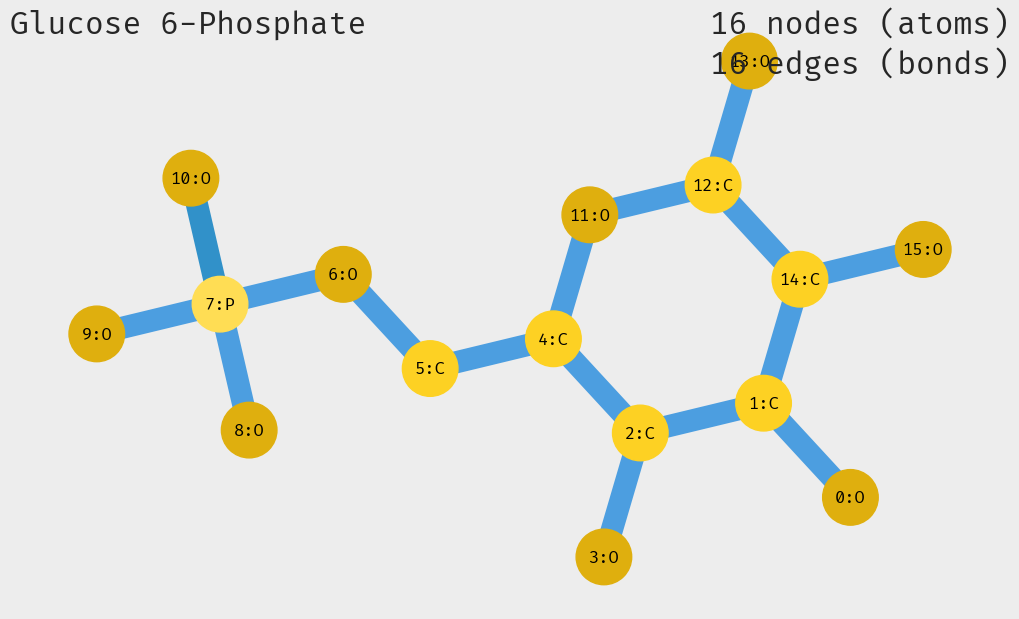

In [61]:
fig = plt.figure(figsize=(10, 6))
nx.draw(G,
        labels = nx.get_node_attributes(G, 'node_name'),
        node_color = node_colors,
        edge_color = edge_colors,
        width = 16,
        pos = nx.get_node_attributes(G, 'pos'),
        with_labels = True,
        node_size=1600)
fig.set_facecolor(COLS['background'])
draw_graph_legend(G, name, loaded_spec.nodes_are, loaded_spec.edges_are)
save_figure(f'{short_name}_graph')
plt.show()

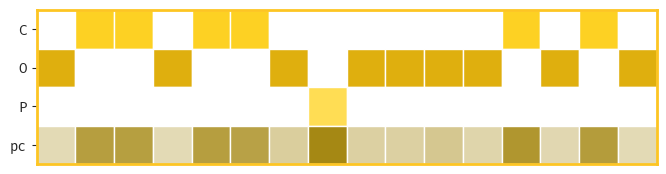

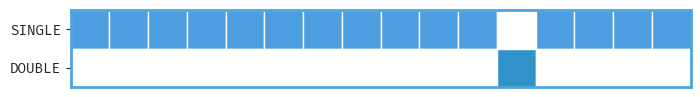

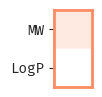

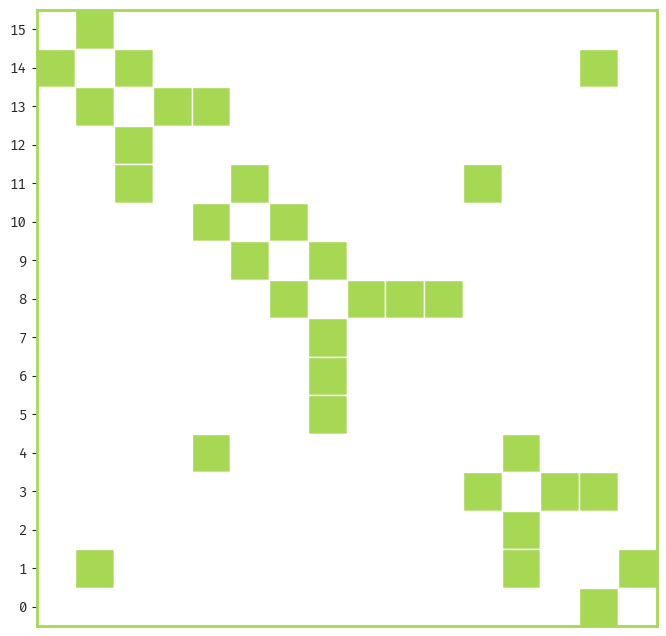

In [58]:
draw_tensor(node_tensor, node_col, node_labels, node_cmaps, .5)
save_figure(f'{short_name}_node_tensor')
draw_tensor(edge_tensor, edge_col, edge_labels, edge_cmaps, .5)
save_figure(f'{short_name}_edge_tensor')
draw_tensor(global_tensor, global_col, global_labels, global_cmaps, .5)
save_figure(f'{short_name}_global_tensor')
adj = nx.to_numpy_array(G)
adj_index =  [f'{i}' for i in range(adj.shape[0])][::-1]
draw_tensor(adj, COLS['adj'], adj_index, draw_text=True)
save_figure(f'{short_name}_adj')